In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history=model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0446 - val_accuracy: 0.9897
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0453 - val_accuracy: 0.9882
Epoch 3/5
750/750 [==============================] - 50s 67ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0445 - val_accuracy: 0.9888
Epoch 4/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0421 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


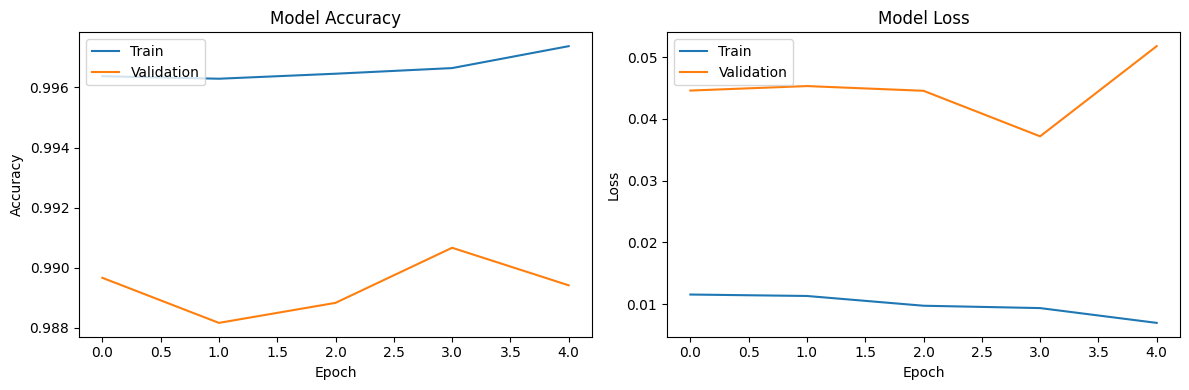

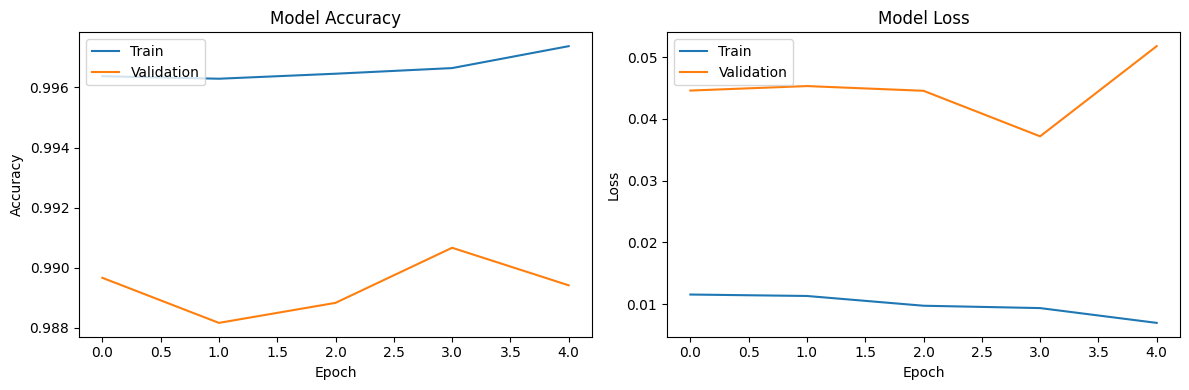

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()